# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

## Problem statement
In the fast-paced taxi booking sector, making the most of the revenue is essential for long-term success and driver happiness. Our goal is to use data driven insights to maximize the revenue streams for taxi-drivers in order to meet this need Our research aims to determine whether payment methdos have an impact on fare pricing by focusing on the relationship between payment type and fare amount 

### Objective
This project's main goal is to run an A/B test to examine the relationship between the total fare ansd the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there's a big difference in the fares for those who pay with credit cards versus those who pay with cash

### Research Question
Is there a relationship between total fare amount and payment type and can we judge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings

warnings.filterwarnings('ignore')

#### Loading the Data

In [2]:
#!pip install opendatasets
#import opendatasets as od
#link = 'https://data.cityofnewyork.us/api/views/kxp8-n2sj/rows.csv?accessType=DOWNLOAD'
#od.download(link)
df = pd.read_csv('2023_Yellow_Taxi_Trip_Data.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,01/01/2023 12:32:10 AM,01/01/2023 12:40:36 AM,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,01/01/2023 12:55:08 AM,01/01/2023 01:01:27 AM,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,01/01/2023 12:25:04 AM,01/01/2023 12:37:49 AM,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,01/01/2023 12:03:48 AM,01/01/2023 12:13:25 AM,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,01/01/2023 12:10:29 AM,01/01/2023 12:21:19 AM,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38310226 entries, 0 to 38310225
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
dtypes: float64(12), int64(4), object(3)
memory usage: 5.4+ GB


In [4]:
df1 = df.sample(n=6000000, random_state=42)

df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])

df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])



df1['duration'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).dt.total_seconds()
df1['duration'] = df1['duration'] / 60
df1.head()

df = df1[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]

df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
30858574,1.0,1,8.6,1.02,7.116667
24900588,1.0,1,20.5,1.86,24.816667
29234980,1.0,1,7.9,0.70,6.933333
26601715,1.0,1,23.3,2.80,29.433333
13290651,1.0,1,16.3,2.19,16.233333


In [5]:
df.isna().sum()

passenger_count    205834
payment_type            0
fare_amount             0
trip_distance           0
duration                0
dtype: int64

In [6]:
# % na in passenger_count
df.isna().sum() * 100/ len(df)

passenger_count    3.430567
payment_type       0.000000
fare_amount        0.000000
trip_distance      0.000000
duration           0.000000
dtype: float64

**We they are just 3.43 % so we can drop them **

In [7]:
df.dropna(inplace = True)
print(6000000 - len(df))
df

205834


,passenger_count,payment_type,fare_amount,trip_distance,duration
30858574,1.0,1,8.6,1.02,7.116667
24900588,1.0,1,20.5,1.86,24.816667
29234980,1.0,1,7.9,0.70,6.933333
26601715,1.0,1,23.3,2.80,29.433333
13290651,1.0,1,16.3,2.19,16.233333
...,...,...,...,...,...
5843948,1.0,2,10.0,1.51,8.533333
10526621,2.0,1,7.2,0.75,6.050000
16508947,1.0,1,8.6,0.90,7.500000
3662479,1.0,1,10.7,1.70,10.166667


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5794166 entries, 30858574 to 33217247
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  float64
 1   payment_type     int64  
 2   fare_amount      float64
 3   trip_distance    float64
 4   duration         float64
dtypes: float64(4), int64(1)
memory usage: 265.2 MB


In [9]:
df['passenger_count'] = df[['passenger_count']].astype('int64')
len(df[df.duplicated()]) 

2590240

In [10]:
len(df) - len(df[df.duplicated()]) 
df.drop_duplicates(inplace = True)


In [11]:
df['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.647824
2    0.197948
3    0.060067
4    0.036060
5    0.022335
0    0.020810
6    0.014940
8    0.000009
7    0.000006
9    0.000001
Name: proportion, dtype: float64

In [12]:
df['payment_type'].value_counts(normalize = True)

payment_type
1    0.742417
2    0.226803
4    0.021662
3    0.009119
Name: proportion, dtype: float64

#### We are studying only for card and cash type therefore we can remove the other 2 

In [13]:
df = df[df['payment_type'] < 3]
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
30858574,1,1,8.6,1.02,7.116667
24900588,1,1,20.5,1.86,24.816667
29234980,1,1,7.9,0.70,6.933333
26601715,1,1,23.3,2.80,29.433333
13290651,1,1,16.3,2.19,16.233333
...,...,...,...,...,...
31373691,3,1,10.7,1.14,10.850000
28265999,1,1,28.9,6.61,18.716667
12361493,1,1,70.0,17.64,45.900000
36055839,1,2,16.3,2.88,14.683333


In [14]:
df['passenger_count'].value_counts()

passenger_count
1    2002936
2     618723
3     188354
4     112231
5      71031
0      64338
6      47643
8         30
7         18
9          4
Name: count, dtype: int64


#### Usally it is not possible that passenger count is > 5 and 0 also doesn't make sense therefore we remove them

In [15]:

df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

#### Lets replace 1 with card and 2 with cash So that things get clear

In [16]:
df['payment_type'].replace([1, 2], ['card', 'cash'], inplace = True)
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
30858574,1,card,8.6,1.02,7.116667
24900588,1,card,20.5,1.86,24.816667
29234980,1,card,7.9,0.70,6.933333
26601715,1,card,23.3,2.80,29.433333
13290651,1,card,16.3,2.19,16.233333
...,...,...,...,...,...
31373691,3,card,10.7,1.14,10.850000
28265999,1,card,28.9,6.61,18.716667
12361493,1,card,70.0,17.64,45.900000
36055839,1,cash,16.3,2.88,14.683333


In [17]:
df.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.993275e+06,2.993275e+06,2.993275e+06,2.993275e+06
mean,1.539960e+00,2.708589e+01,5.414447e+00,2.415666e+01
std,9.402040e-01,8.633482e+01,7.829970e+01,5.655972e+01
min,1.000000e+00,-7.500000e+02,0.000000e+00,-1.177000e+03
25%,1.000000e+00,1.280000e+01,1.590000e+00,1.166667e+01
50%,1.000000e+00,1.980000e+01,2.910000e+00,1.850000e+01
75%,2.000000e+00,3.380000e+01,6.630000e+00,2.811667e+01
max,5.000000e+00,1.431635e+05,9.231120e+04,9.014900e+03


** fare amount, trip distance and duration are -ve which is not possible, So we remove them **

In [18]:
df = df[df['fare_amount'] > 0]
df = df[df['trip_distance'] > 0]
df = df[df['duration'] > 0]

{'whiskers': [<matplotlib.lines.Line2D at 0x22b684159d0>,
 'caps': [<matplotlib.lines.Line2D at 0x22b68415f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x22b68415730>],
 'medians': [<matplotlib.lines.Line2D at 0x22b8f01f490>],
 'fliers': [<matplotlib.lines.Line2D at 0x22b8f01f730>],
 'means': []}

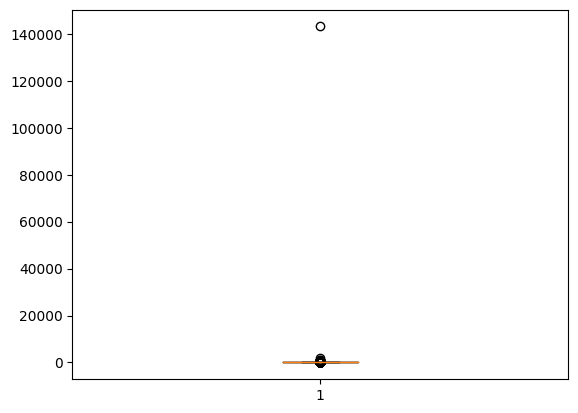

In [19]:
plt.boxplot(df['fare_amount'])

**Way too many outlier are present in the data, we have to remove them. We can use Z-score or Inter Quantile Range(IQR) Z-score can't be used because of the distribution. Therefore, We use IQR**

In [20]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

df

,passenger_count,payment_type,fare_amount,trip_distance,duration
30858574,1,card,8.6,1.02,7.116667
24900588,1,card,20.5,1.86,24.816667
29234980,1,card,7.9,0.70,6.933333
26601715,1,card,23.3,2.80,29.433333
13290651,1,card,16.3,2.19,16.233333
...,...,...,...,...,...
25887326,1,card,19.1,3.18,16.600000
31373691,3,card,10.7,1.14,10.850000
28265999,1,card,28.9,6.61,18.716667
36055839,1,cash,16.3,2.88,14.683333


(array([121395., 623243., 689268., 456670., 282667., 149532.,  68088.,
          8890.,    721.,   1247.]),
 array([1.0000e-02, 6.5140e+00, 1.3018e+01, 1.9522e+01, 2.6026e+01,
        3.2530e+01, 3.9034e+01, 4.5538e+01, 5.2042e+01, 5.8546e+01,
        6.5050e+01]),
 <BarContainer object of 10 artists>)

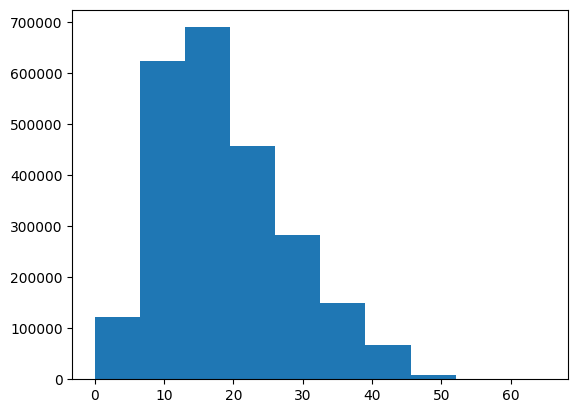

In [21]:
plt.hist(df['fare_amount'])

In [22]:
df.to_csv('final_file.csv', index = False)

#### We have done Data Clearning and Transforming, We will Analysis in Next NoteBook 'analysis'